In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
X=[] #ammos,speed
Y=[] #survival

In [8]:
import urllib.request

url = "https://docs.google.com/spreadsheets/d/1n80MKN7eWNrhfpJA2L9McdWCfb6H18Pn7LA8uiZO0-U/export?format=csv"

response = urllib.request.urlopen(url)
data = response.read().decode('utf-8')

lines = data.split("\n")

for line in lines[1:]:
    line = line.strip()

    features = line.split(",")

    speed, ammo, survived = features
    X.append([float(speed), float(ammo)])
    Y.append(int(survived))

X = np.array(X)
Y = np.array(Y)


In [9]:
#Normalizing the features
x_mean = X.mean(axis=0)
x_std = X.std(axis=0)

x_norm = (X - x_mean) / x_std

x_bias = np.hstack((np.ones((x_norm.shape[0], 1)), x_norm))

In [10]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def cost_function(Xb,Y,theta):
  h0x = sigmoid(np.dot(Xb,theta))
  cost = -np.mean(Y * np.log(h0x) + (1 - Y) * np.log(1 - h0x))
  return cost

In [11]:
theta = np.zeros(x_bias.shape[1])
alpha = 0.0001
iterations = 100000
costs = []

for i in range(iterations):
  preds = sigmoid(np.dot(x_bias,theta))
  theta = theta - alpha * np.dot(x_bias.T,(preds-Y))
  costs.append(cost_function(x_bias,Y,theta))

1. Test Prediction : Runner: 25 km/h, 1 Ammo Clip

In [12]:
test = np.array([25, 1])
test_norm = (test - x_mean)/x_std
test_bias = np.hstack([1.0, test_norm])
pb = sigmoid(test_bias.dot(theta))
print("Survival probability for 25 km/h, 1 clip:", pb)

Survival probability for 25 km/h, 1 clip: 0.9996063795030649


2. Visualizing the cost drop

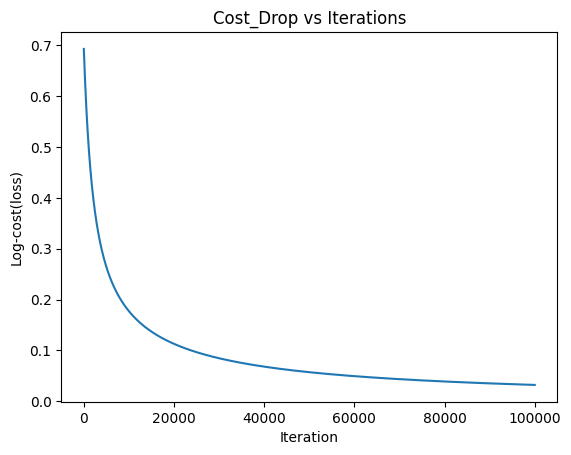

In [13]:
plt.plot(range(0, iterations), costs)
plt.xlabel("Iteration")
plt.ylabel("Log-cost(loss)")
plt.title("Cost_Drop vs Iterations")
plt.show()

3. Decision Boundary

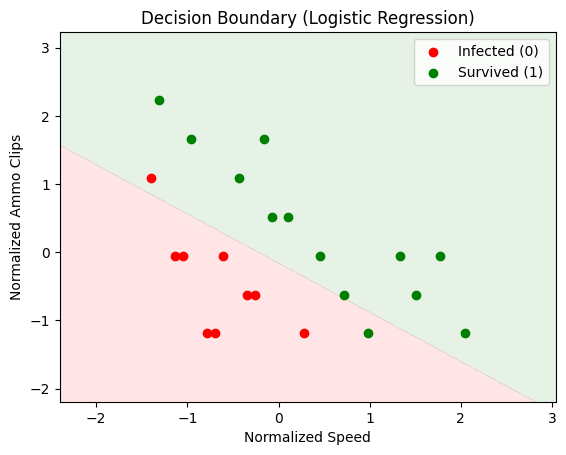

In [14]:
# probability = 0.5
# sigmoid = 0.5;when z = 0
xx = np.linspace(x_norm[:,0].min()-1, x_norm[:,0].max()+1, 100)
yy = np.linspace(x_norm[:,1].min()-1, x_norm[:,1].max()+1, 100)

grid = np.array([[x, y] for x in xx for y in yy])
grid_bias = np.hstack([np.ones((grid.shape[0],1)), grid])
probs = sigmoid(grid_bias.dot(theta)).reshape(len(xx), len(yy))

plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], colors=["red", "green"], alpha=0.1)

plt.scatter(x_norm[Y==0, 0], x_norm[Y==0, 1], label="Infected (0)", c="red")
plt.scatter(x_norm[Y==1, 0], x_norm[Y==1, 1], label="Survived (1)", c="green")

plt.xlabel("Normalized Speed")
plt.ylabel("Normalized Ammo Clips")
plt.title("Decision Boundary (Logistic Regression)")
plt.legend()
plt.show()


